In [1]:
library(tidyverse)
library(ggplot2)
library(ggpubr)
library(data.table)



print("Loaded libraries.")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




[1] "Loaded libraries."


In [2]:
#Set working directory 
setwd("/data/hodges_lab/Tim/BMC_HMR_Length/")

In [3]:
setwd("/data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/")
list.files()

[1] "Adrenal.minsize50.filtforrefseqTSSexons.txt"   
 [2] "Bcell.minsize50.filtforrefseqTSSexons.txt"     
 [3] "BT.minsize50.filtforrefseqTSSexons.txt"        
 [4] "fHeart.minsize50.filtforrefseqTSSexons.txt"    
 [5] "Fig1.All_but_H1.merged.txt"                    
 [6] "Fig1.All_but_H1.sorted.txt"                    
 [7] "fSpinal.minsize50.filtforrefseqTSSexons.txt"   
 [8] "H1ESC.minsize50.filtforrefseqTSSexons.txt"     
 [9] "HMR_lengths.2000bp_xlim.pdf"                   
[10] "HSC.minsize50.filtforrefseqTSSexons.txt"       
[11] "Liver.minsize50.filtforrefseqTSSexons.txt"     
[12] "Macrophage.minsize50.filtforrefseqTSSexons.txt"
[13] "MNBT.minsize50.filtforrefseqTSSexons.txt"      
[14] "Neutrophil.minsize50.filtforrefseqTSSexons.txt"
[15] "other"                                         
[16] "Tcell.minsize50.filtforrefseqTSSexons.txt"     
[17] "temp.u.txt"                                    
[18] "temp.v.txt"

# Load in files

In [6]:
list_of_filenames_all <- list.files(pattern = "*minsize50.filtforrefseqTSSexons.txt")
list_of_filenames <- list_of_filenames_all[!list_of_filenames_all %in% c("MNBT.minsize50.filtforrefseqTSSexons.txt", "BT.minsize50.filtforrefseqTSSexons.txt")]
list_of_filenames

[1] "Adrenal.minsize50.filtforrefseqTSSexons.txt"   
 [2] "Bcell.minsize50.filtforrefseqTSSexons.txt"     
 [3] "fHeart.minsize50.filtforrefseqTSSexons.txt"    
 [4] "fSpinal.minsize50.filtforrefseqTSSexons.txt"   
 [5] "H1ESC.minsize50.filtforrefseqTSSexons.txt"     
 [6] "HSC.minsize50.filtforrefseqTSSexons.txt"       
 [7] "Liver.minsize50.filtforrefseqTSSexons.txt"     
 [8] "Macrophage.minsize50.filtforrefseqTSSexons.txt"
 [9] "Neutrophil.minsize50.filtforrefseqTSSexons.txt"
[10] "Tcell.minsize50.filtforrefseqTSSexons.txt"

In [7]:
list_of_tsv <- lapply(list_of_filenames, read_tsv, col_names = c("chr", "start", "end", "length"))

Rows: 36610 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr
dbl (3): start, end, length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 34070 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr
dbl (3): start, end, length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 43473 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr
dbl (3): start, end, length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 44390 Columns: 4
── Column specification ─────

## Rename

In [8]:
list_of_celltypeNames <- map(list_of_filenames, ~ gsub("\\..*", "", .))

In [9]:
names(list_of_tsv) <- list_of_celltypeNames

In [10]:
list_of_tsv_length <- map(list_of_tsv, ~ nrow(.))
list_of_tsv_length

$Adrenal
[1] 36610

$Bcell
[1] 34070

$fHeart
[1] 43473

$fSpinal
[1] 44390

$H1ESC
[1] 18235

$HSC
[1] 46056

$Liver
[1] 38132

$Macrophage
[1] 54331

$Neutrophil
[1] 49103

$Tcell
[1] 32366

## Combine

In [11]:
df_of_tsv <- rbindlist(list_of_tsv, idcol = "Celltype")
df_of_tsv

Celltype,chr,start,end,length
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Adrenal,chr1,28511,29415,904
Adrenal,chr1,91118,91580,462
Adrenal,chr1,521379,521660,281
Adrenal,chr1,564500,566009,1509
Adrenal,chr1,566518,566879,361
Adrenal,chr1,567166,568325,1159
Adrenal,chr1,568477,568610,133
Adrenal,chr1,568760,569558,798
Adrenal,chr1,569692,570301,609


# Calculate medians

In [12]:
df_of_tsv_medianLength <- df_of_tsv %>% group_by(Celltype) %>% summarize(medianLength = median(length))
df_of_tsv_medianLength %>% arrange(medianLength)

Celltype,medianLength
<chr>,<dbl>
H1ESC,439
Macrophage,451
Neutrophil,457
Tcell,468
HSC,486
Bcell,494
fHeart,535
Adrenal,569
fSpinal,657


In [13]:
mean(df_of_tsv$length)
median(df_of_tsv$length)

[1] 723.6874

[1] 521

# Plot

In [14]:
setwd("/data/hodges_lab/Tim/BMC_HMR_Length/")

In [15]:
getwd()

[1] "/gpfs52/data/hodges_lab/Tim/BMC_HMR_Length"

png 
  2

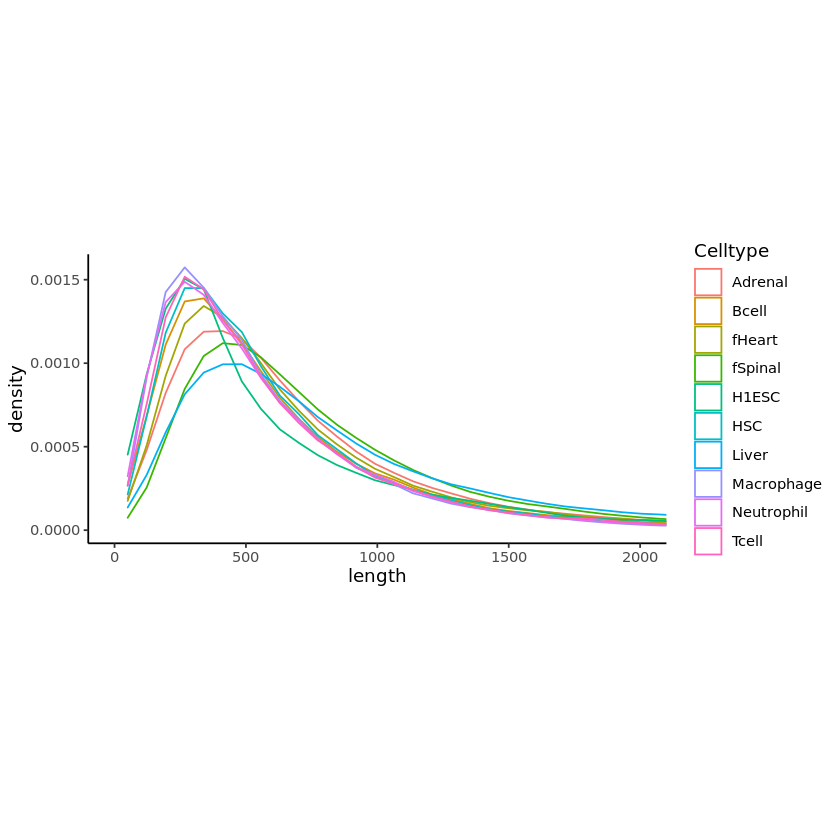

In [16]:
pdf("HMR_lengths.2000bp_xlim.wNeut.pdf")

p_2000 <- df_of_tsv %>%
ggplot(aes(x = length)) +
geom_density(aes(color = Celltype)) +
coord_cartesian(xlim = c(0, 2000)) +
theme_classic() +
theme(aspect.ratio = 0.5)
p_2000

dev.off()
p_2000

png 
  2

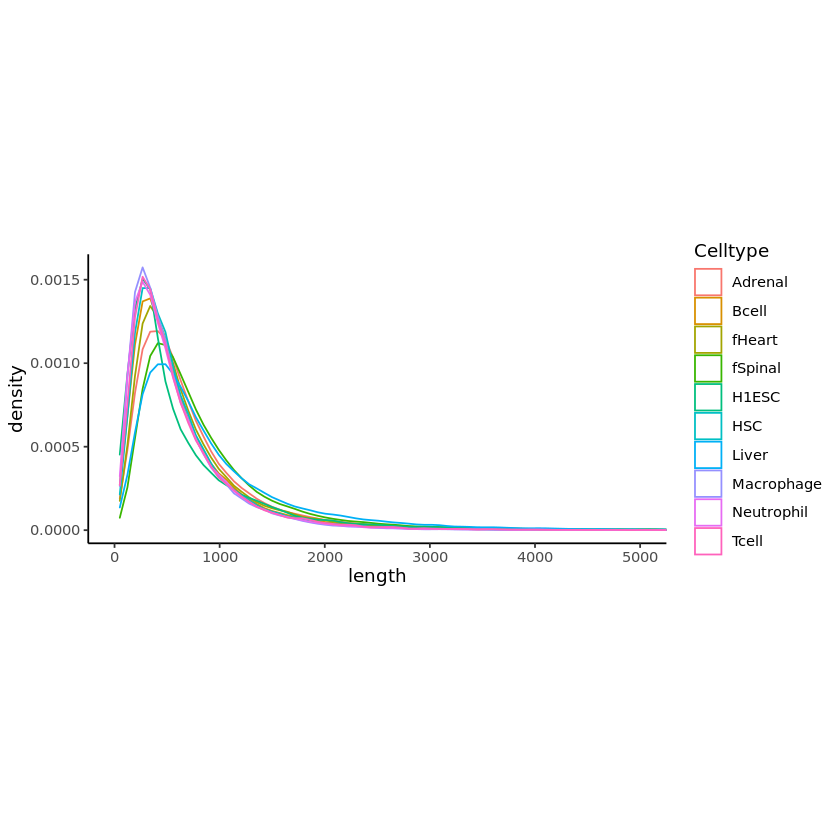

In [17]:
pdf("HMR_lengths.5000bp_xlim.wNeut.pdf")

p_5000 <- df_of_tsv %>%
ggplot(aes(x = length, color = Celltype)) +
geom_density() +
coord_cartesian(xlim = c(0, 5000)) +
theme_classic() +
theme(aspect.ratio = 0.5)
p_5000

dev.off()
p_5000

png 
  2

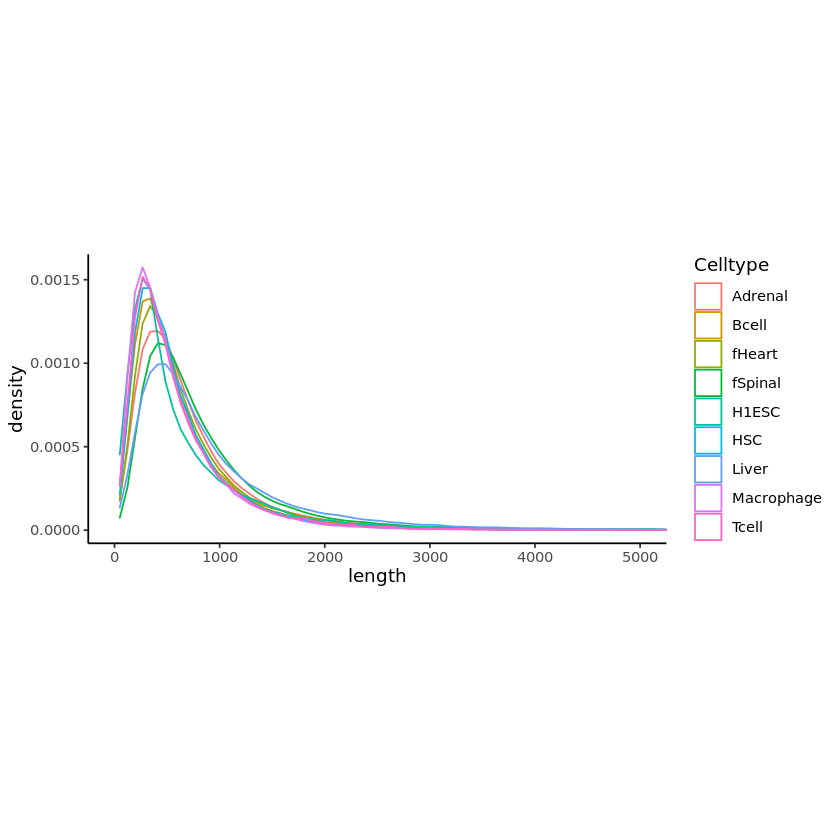

In [67]:
pdf("HMR_lengths.5000bp_xlim.wNeut.pdf")

p_5000 <- df_of_tsv %>%
ggplot(aes(x = length, color = Celltype)) +
geom_density() +
coord_cartesian(xlim = c(0, 5000)) +
theme_classic() +
theme(aspect.ratio = 0.5)
p_5000

dev.off()
p_5000

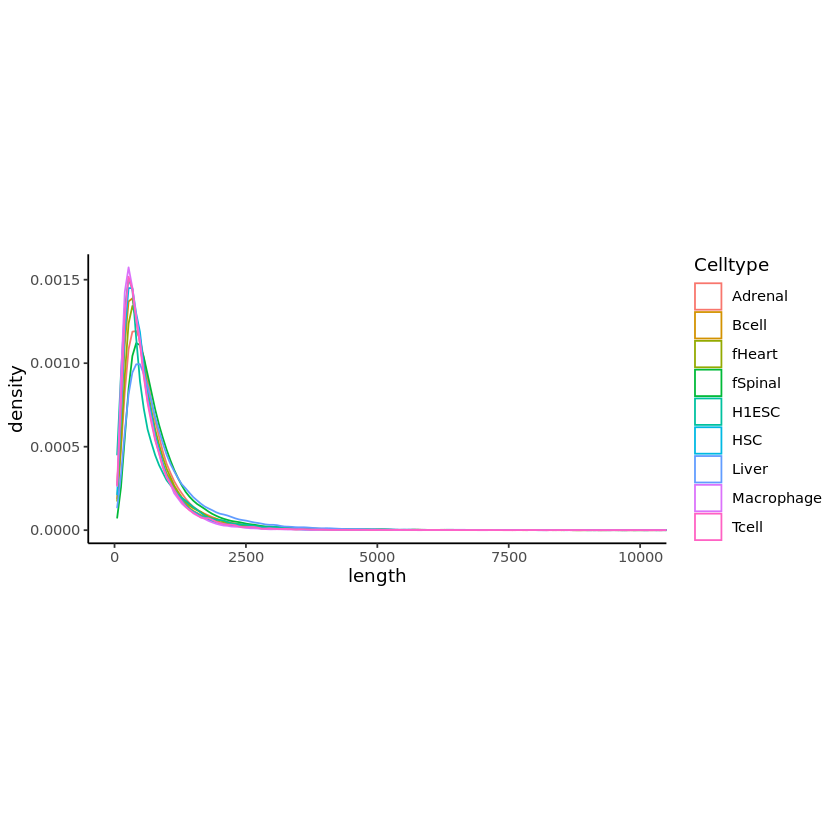

In [53]:
df_of_tsv %>%
ggplot(aes(x = length, color = Celltype)) +
geom_density() +
coord_cartesian(xlim = c(0, 10000)) +
theme_classic() +
theme(aspect.ratio = 0.5)